In [7]:
import numpy as np
import math
import matplotlib.pyplot as plt
import cv2
import random

%matplotlib inline

In [27]:
#画像読み込み　α処理　グレースケール化
img=cv2.imread('../images/r_2.png',-1)
index=np.where(img[:,:,3]==0)
img[index]=[255,255,255,255]
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


In [28]:
#識別機作成　計算
akaze=cv2.AKAZE_create()
kp=akaze.detect(img,None)

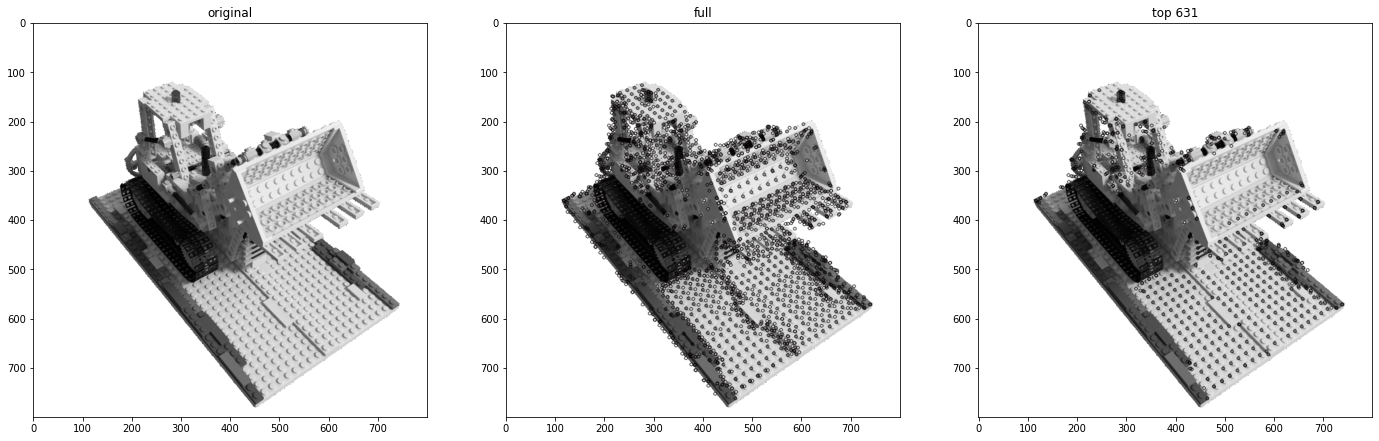

In [29]:
#ノード数
index_num=int(len(kp)*0.3)

dec=np.empty([len(kp)])
for i in range(len(kp)):
    dec[i]=kp[i].response
dec_sort_index=np.argsort(dec)
#強度が大きい順にノード数分のキーポイントを格納
top_kp=[]
for i in range(1,index_num+1):
    top_kp.append(kp[dec_sort_index[-i]])
#フルキーポイントと上位複数のみの描画
fullimg=cv2.drawKeypoints(img,kp,None,4)
topimg=cv2.drawKeypoints(img,top_kp,None,4)


plt.figure(figsize=(12*2,8*2))

plt.subplot(131)
plt.imshow(img,cmap='gray')
plt.title('original')

plt.subplot(132)
plt.imshow(fullimg)
plt.title('full')

plt.subplot(133)
plt.imshow(topimg)
plt.title(f'top {index_num}')

plt.show()